# Homework 02 --- Session 3, Multilinear regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
%matplotlib inline



## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [2]:
data = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv',index_col=0)
data



,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


#### a)  $x_1$ is the one working as the intercept term

#### b) Calculate the coefficients  ŵ  manually or with python numpy module by using matrix computation.


In [3]:
Y = np.matrix(data.y).T
X = np.matrix(data.drop('y',axis=1))
w = (X.T * X).I * X.T * Y


If the model's formula is: 

$$y = w_0 + w_1x_2 + w_2x_3 + \epsilon$$

Then the coefficients are: 

In [4]:
print ' w_0 = %.1f \n w_1 = %.1f \n w_2 = %.1f' %(w[0],w[1],w[2])

 w_0 = 2.0 
 w_1 = 0.7 
 w_2 = -0.5


#### (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.

In [5]:
lm = smf.ols(formula = 'y ~ x2 + x3',data = data).fit()
print lm.params

Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


#### d)  Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

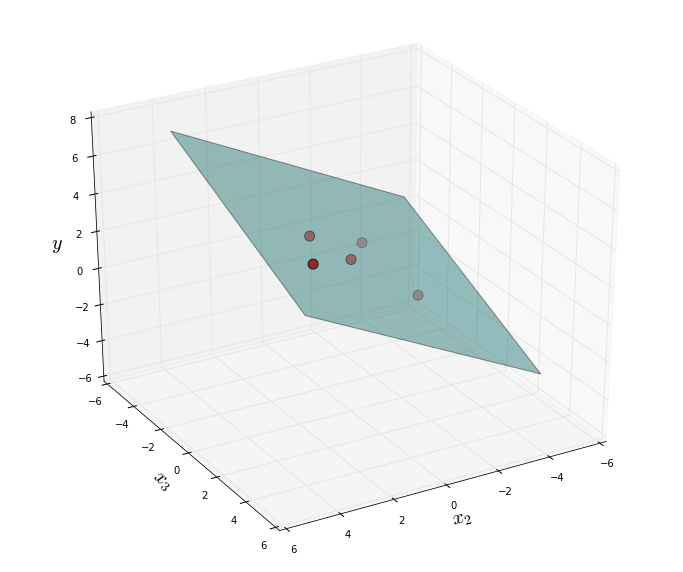

In [6]:
fig = plt.figure(figsize = (12,10))  
ax = fig.gca(projection='3d')  
ax.scatter(data.x2, data.x3, data.y, s = 100,  c = 'r')

#hyperplane
radius = 5
x2, x3 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm.params[0] + lm.params[1] * x2 + lm.params[2] * x3

ax.plot_surface(x2, x3, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_2$', fontsize = 20)
ax.set_ylabel('$x_3$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Total population (for each zip code)
* Population with No Insurance coverage
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with NO Insurance coverage
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with BOTH types of Insurance coverage
* (c) Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

In [23]:
data2 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv')
data2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private
0,10001,77512.0,22767,1958,20809,5800,16795
1,10002,26905.0,79490,9129,70361,40139,35167
2,10003,79088.0,56909,3774,53135,8593,48522
3,10004,98020.0,3024,244,2780,180,2705
4,10005,99633.0,7566,570,6996,122,6944


#### (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information

In [24]:
#a both public and private
data2.index = data2.Zipcode
data2['both'] =  (data2.Public + data2.Private) - (data2.TotalPop - data2.NoCoverage)
#b modify the old data frame
data2['onlyPublic'] = data2.Public - data2.both
data2['onlyPrivate'] = data2.Private - data2.both

data2.drop(['Zipcode','Public','Private'],axis = 1,inplace=True)
data2.head()

,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,both,onlyPublic,onlyPrivate
Zipcode,,,,,,,
10001,77512.0,22767,1958,20809,1786,4014,15009
10002,26905.0,79490,9129,70361,4945,35194,30222
10003,79088.0,56909,3774,53135,3980,4613,44542
10004,98020.0,3024,244,2780,105,75,2600
10005,99633.0,7566,570,6996,70,52,6874


In [25]:
#c drop the parts with NaN(if any),
print data2.shape
data2.dropna(inplace=True)
print data2.shape

(206, 7)
(181, 7)


#### c) Convert all population number into proportion 


In [26]:
#dataP  = data2.copy()
for col in data2.columns[2:]:

    data2[col] = data2[col] / data2.TotalPop * 100 
    
data2.head()



,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,both,onlyPublic,onlyPrivate
Zipcode,,,,,,,
10001,77512.0,22767,8.600167,91.399833,7.844687,17.630781,65.924364
10002,26905.0,79490,11.484463,88.515537,6.220908,44.274752,38.019877
10003,79088.0,56909,6.631640,93.368360,6.993621,8.105923,78.268815
10004,98020.0,3024,8.068783,91.931217,3.472222,2.480159,85.978836
10005,99633.0,7566,7.533703,92.466297,0.925192,0.687285,90.853820


##### d) Regress over these proportions. Briefly state what you've obtained.

In [27]:
lm2 = smf.ols(formula = 'IncomePerCapita ~ WithCoverage + both + onlyPublic + onlyPrivate', data = data2).fit()
print lm2.summary()

data2['predictedIncome'] = lm2.predict(data2)
data2['errors']= data2.IncomePerCapita - data2.predictedIncome

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Sat, 01 Oct 2016   Prob (F-statistic):           3.25e-37
Time:                        12:28:07   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept    -6.303e+04   2.76e+04     -2.280   

### Extra credit:
#### Visualize the observed income versus the predicted income, like what we did in the lab session. 
Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

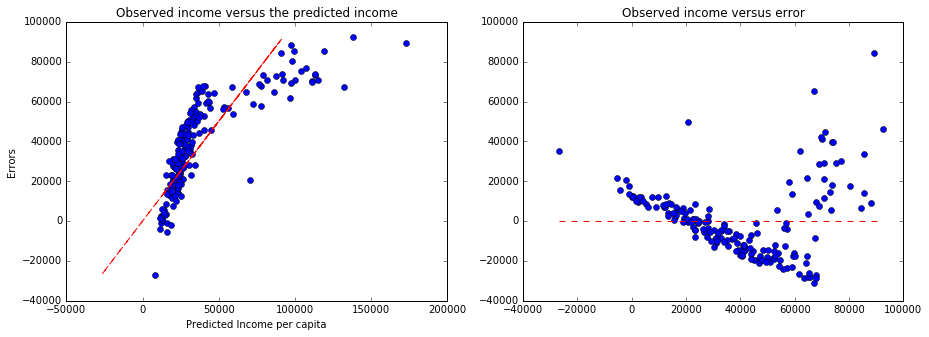

In [28]:


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.plot(data2.IncomePerCapita,data2.predictedIncome,'o')
ax.plot(data2.predictedIncome,data2.predictedIncome,'--r', linewidth = 1)       

ax.set_title('Observed income versus the predicted income')
ax.set_xlabel('Income per capita')
ax.set_ylabel('Predicted income')

ax2.plot(data2.predictedIncome,data2.errors,'o')
ax2.plot([min(data2.predictedIncome),max(data2.predictedIncome)],[0,0],'--r', linewidth = 1)       
ax2.set_title('Observed income versus error')
ax.set_xlabel('Predicted Income per capita')
ax.set_ylabel('Errors')

In [29]:
#correlation matrix
data2.corr()

,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,both,onlyPublic,onlyPrivate,predictedIncome,errors
IncomePerCapita,1.000000,-0.374920,-6.027527e-01,6.027527e-01,1.015777e-01,-7.464168e-01,7.780395e-01,7.888058e-01,6.146425e-01
TotalPop,-0.374920,1.000000,3.813918e-01,-3.813918e-01,-1.798632e-01,4.435680e-01,-4.338298e-01,-4.587804e-01,-2.120149e-02
NoCoverage,-0.602753,0.381392,1.000000e+00,-1.000000e+00,-3.444472e-01,5.563888e-01,-6.794304e-01,-7.641332e-01,7.956854e-16
WithCoverage,0.602753,-0.381392,-1.000000e+00,1.000000e+00,3.444472e-01,-5.563888e-01,6.794304e-01,7.641332e-01,-8.475116e-16
both,0.101578,-0.179863,-3.444472e-01,3.444472e-01,1.000000e+00,-2.013090e-01,-2.464449e-02,1.287740e-01,-3.447128e-15
onlyPublic,-0.746417,0.443568,5.563888e-01,-5.563888e-01,-2.013090e-01,1.000000e+00,-9.402093e-01,-9.462619e-01,9.193421e-16
onlyPrivate,0.778040,-0.433830,-6.794304e-01,6.794304e-01,-2.464449e-02,-9.402093e-01,1.000000e+00,9.863512e-01,-1.901170e-16
predictedIncome,0.788806,-0.458780,-7.641332e-01,7.641332e-01,1.287740e-01,-9.462619e-01,9.863512e-01,1.000000e+00,-6.671991e-16
errors,0.614643,-0.021201,7.956854e-16,-8.475116e-16,-3.447128e-15,9.193421e-16,-1.901170e-16,-6.671991e-16,1.000000e+00


The plots shows that the model performance is not optimal. There is some aspect of the pattern that the model is not taking into account. As the correlation matrix shows, the variables more correlated to Income Per Capita is the proportion of people with only private insurance (in a positive way, as this proportion grows higher also does the income). 

The other variable with high correlation with Income Per Capita is the proportion of people with only public insurance (in a negative way, as this proportion grows lower income increases). Nevertheless, this two variables are strongly correlated with each other (in a negative way). We could said that one is the complement of the other for each zipcode, what makes sense. Therefore, we shouldn't use both at the same time in the model. 

The third variable with high correlation to Income is the proportion of people with insurance (either public or private). So, it would make sense to run the model whis this specification.

In [30]:
lm3 = smf.ols(formula = 'IncomePerCapita ~ WithCoverage + onlyPrivate', data = data2).fit()
print lm3.summary()

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sat, 01 Oct 2016   Prob (F-statistic):           1.12e-37
Time:                        12:28:46   Log-Likelihood:                -2034.8
No. Observations:                 181   AIC:                             4076.
Df Residuals:                     178   BIC:                             4085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept    -8.325e+04   2.53e+04     -3.289   

The $R^2$ are very similar in both specifications, so in this aspect there is no reason for choosing one model over the previous, other than parsimony. What soports this model's spacification is the fact that everyone of its parameters is statistically significant (at 95% confidence), while in the previous the parameter for the proportion of persons with both types of insurences had p-value = 0.352.  

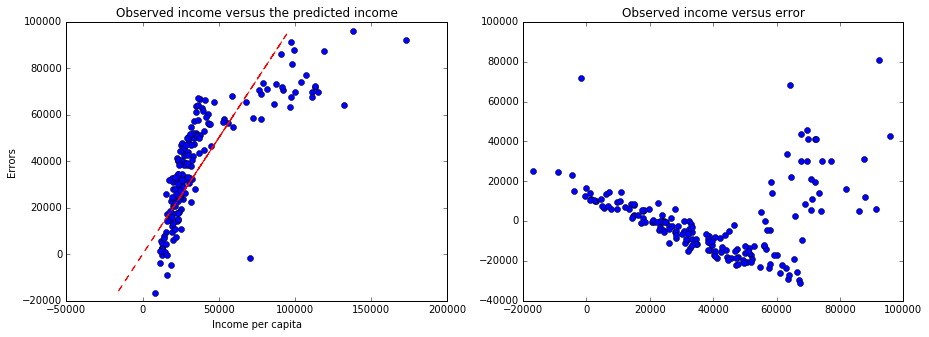

In [31]:
predictedIncome3 = lm3.predict(data2)
errors3= data2.IncomePerCapita - predictedIncome3

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.plot(data2.IncomePerCapita,predictedIncome3,'o')
ax.plot(predictedIncome3,predictedIncome3,'--r', linewidth = 1)       

ax.set_title('Observed income versus the predicted income')
ax.set_xlabel('Income per capita')
ax.set_ylabel('Predicted income')

ax2.plot(predictedIncome3,errors3,'o')
ax2.set_title('Observed income versus error')
ax.set_xlabel('Income per capita')
ax.set_ylabel('Errors')

Nevertheless, the problem remains. So, it would be helpull take a look at the type of relation between income and the variable that has the biggest correlation with: the proportion of people with only private insurance.

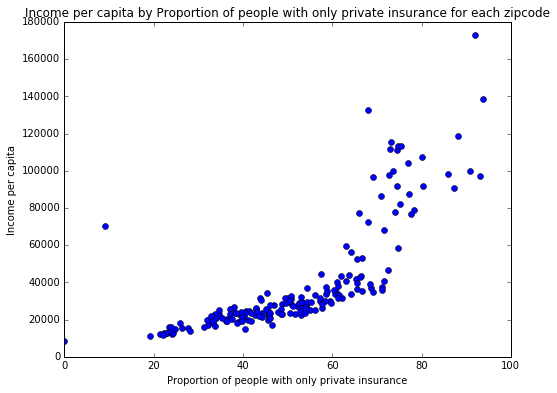

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.plot(data2.onlyPrivate,data2.IncomePerCapita,'o')
ax.set_title('Income per capita by Proportion of people with only private insurance for each zipcode')
ax.set_xlabel('Proportion of people with only private insurance')
ax.set_ylabel('Income per capita')

The plot shows a rather exponential relation. It make sense, as we are establishing a relation between proportions and absolute numbers.

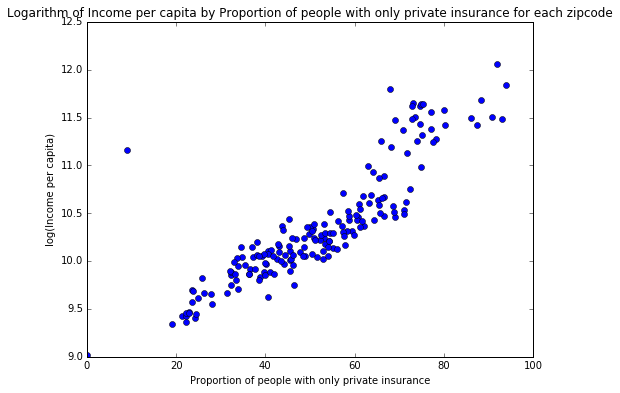

In [33]:
data2['IncomePerCapitaLog'] = np.log(data2.IncomePerCapita)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.plot(data2.onlyPrivate,data2.IncomePerCapitaLog,'o')
ax.set_title('Logarithm of Income per capita by Proportion of people with only private insurance for each zipcode')
ax.set_xlabel('Proportion of people with only private insurance')
ax.set_ylabel('log(Income per capita)')

The graph show that this realtion is more linear. It also shows the presence of an outlier.

In [34]:
zipOutlier2 = data2.sort_values(by='onlyPrivate',ascending=True).index[0:2]

print data2.shape
data2.drop(zipOutlier2,inplace=True)
print data2.shape

(181, 10)
(179, 10)


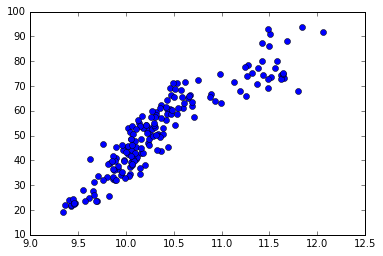

In [35]:
plt.plot(data2.IncomePerCapitaLog,data2.onlyPrivate,'o')

A new model is tried, with better results ($R^2 = 0.844$, both parameters bellow $p-value = 0.05$)

In [38]:
lm4 = smf.ols(formula = 'IncomePerCapitaLog ~ WithCoverage + onlyPrivate', data = data2).fit()
print lm4.summary()

                            OLS Regression Results                            
Dep. Variable:     IncomePerCapitaLog   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     474.5
Date:                Sat, 01 Oct 2016   Prob (F-statistic):           1.28e-71
Time:                        12:30:56   Log-Likelihood:                 4.3164
No. Observations:                 179   AIC:                            -2.633
Df Residuals:                     176   BIC:                             6.929
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        9.4087      0.366     25.737   

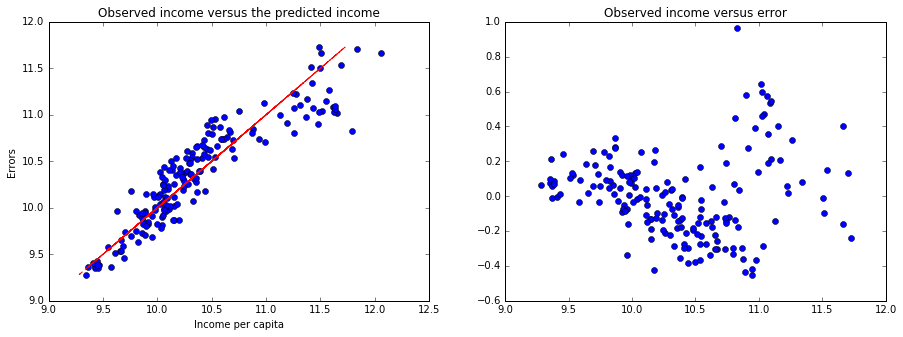

In [39]:
predictedIncome4 = lm4.predict(data2)
errors4= data2.IncomePerCapitaLog - predictedIncome4

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.plot(data2.IncomePerCapitaLog,predictedIncome4,'o')
ax.plot(predictedIncome4,predictedIncome4,'--r', linewidth = 1)       

ax.set_title('Observed income versus the predicted income')
ax.set_xlabel('Income per capita')
ax.set_ylabel('Predicted income')

ax2.plot(predictedIncome4,errors4,'o')
ax2.set_title('Observed income versus error')
ax.set_xlabel('Income per capita')
ax.set_ylabel('Errors')

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four(4) subfigures, then in each subfigure:
    * (e.1) Draw the scatter plot
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick a x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

##### a) Draw the scatter plot of x and y, guess what polynomial could be the best choice.

The best choice could be $x^4$ 

          y    x1
0  2.613388 -0.50
1  2.170351 -0.32
2  0.049546 -0.14
3  1.158258  0.04
4  1.397567  0.22
5  1.773240  0.40


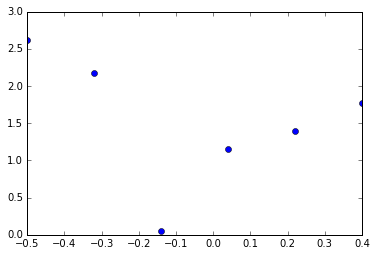

In [43]:
data3 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv')
print data3
plt.plot(data3.x1,data3.y,'o')

#### b) Create new columns in data frame to contain the information of  $x^2, x^3, x^4$  

In [44]:
power = 2
formula = 'y ~ x1'
lm = smf.ols(formula = formula, data = data3).fit()
Rdict = {'x1':{'R2':lm.rsquared,'params':lm.params}}


while power <=4 :
    xId = 'x'+str(power)
    
    #c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    data3[xId] = data3.x1 * data3.iloc[:,len(data3.columns)-1]
    formula = formula + ' + ' + xId 
    lm = smf.ols(formula = formula, data = data3).fit()    

    #For each model, store your fitted parameters as well as your  R2
    Rdict[xId] = {'R2':lm.rsquared,'params':lm.params}
    
    #d) Report the  R2R2 , plot it and observe how it changes
    if power == 2:
        print 'R2 x1: %.2f' %Rdict['x1']['R2']
    print 'R2 %s: %.2f'  %(xId,Rdict[xId]['R2'])
    power += 1


R2 x1: 0.10
R2 x2: 0.65
R2 x3: 0.67
R2 x4: 0.80


#### e) Create a figure with four  subfigures

y0_fited -0.0858791285809
y0_fited 0.0633052294332
y0_fited 0.130464398498
y0_fited 0.432215434196


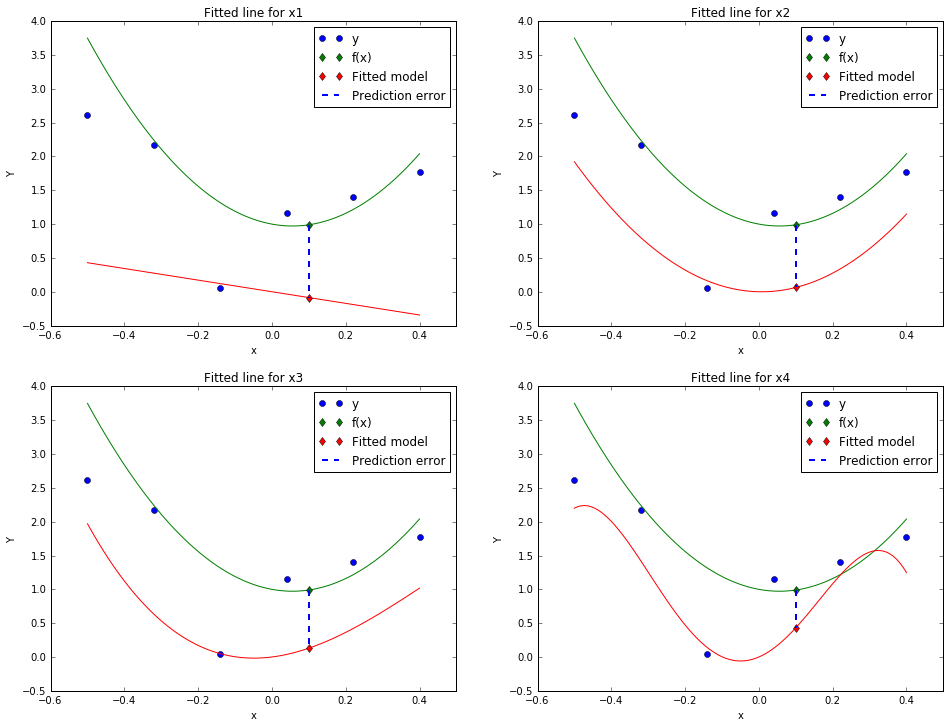

In [53]:
fig = plt.figure(figsize=(16,12))

def fx(x):
    return (9*(x**2)) - x + 1

x_fit = np.linspace(min(data3.x1),max(data3.x1),100)
y_fit = map(fx,x_fit)

for power in range(1,5):
    xId = 'x'+str(power)
    ax = fig.add_subplot(2,2,power)
    ax.set_xlim([-.6, .5])
    
    #(e.1) Draw the scatter plot
    ax.plot(data3.x1,data3.y,'o')
    
    #(e.2) Plot the curve of true function  f(x)=9x2−x+1 
    ax.plot(x_fit,y_fit,'g-')

    #(e.3) Plot your fitted curve, observe how our model fits the data as M increases
    
    y_fit2 = pd.DataFrame(np.matrix([x_fit**k for k in range(1,power+1)]).T,
                         columns = ['x1','x2','x3','x4'][0:power]).mul(Rdict[xId]['params'], 1).sum(1)    
    
    ax.plot(x_fit, y_fit2, 'r-')
    ax.set_title('Fitted line for ' + xId)
    ax.set_xlabel('x')
    ax.set_ylabel('Y')
    
#    (g.1) Pick a x value (at your discretion)  x0 , then locate the y value both on your fitted curve and on our function curve ( f(x0)
    x0 = 0.1
    x0List = [x0]

    exp = 2
    while exp <= 4:
        x0List.append(x0**exp)
        exp += 1

    x0Series = pd.Series(x0List, index=['x1','x2','x3','x4'])

    y0_true = fx(x0)
    y0_fited = x0Series.mul(Rdict[xId]['params']).sum()
    print 'y0_fited', y0_fited
    
    #(g.2) Mark these two points with a small diamond, then draw a dashed line connecting them
    #, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    
    ax.plot(x0,y0_true,'gd',label="f(x)")
    ax.plot(x0,y0_fited,'rd',label="Fitted model")
    ax.plot([x0,x0],[y0_true,y0_fited],'b--',lw = 2,label="Prediction error")
    plt.legend()

Based on the plot, the model that fits the true curve best is the second one, with only $x$ and $x^2$.

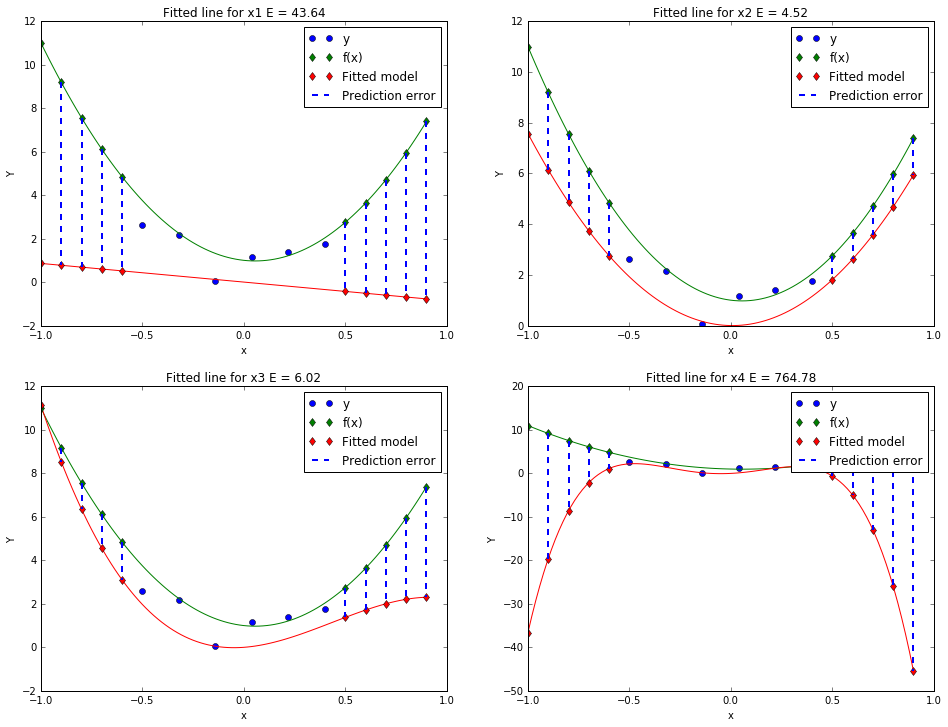

In [85]:
#(g.3) Repeat g.1 and g.2 up to ten times
#(i.e. select up to ten different future points and predict their values, compare your prediction with the true value), 

fig = plt.figure(figsize=(16,12))

#five points to the left, 5 to the right of the domain of original x1
g3points = np.array([-.6,-.7,-.8,-.9,-1,.5,.6,.7,.8,.9])
y_g3True = map(fx,g3points)

x_fit = np.linspace(min(g3points),max(g3points),100)
y_fit = map(fx,x_fit)



for power in range(1,5):
    xId = 'x'+str(power)
    ax = fig.add_subplot(2,2,power)
    ax.set_xlim([-1, 1])
    
    #(e.1) Draw the scatter plot
    ax.plot(data3.x1,data3.y,'o')
    
    #(e.2) Plot the curve of true function  f(x)=9x2−x+1 
    ax.plot(x_fit,y_fit,'g-')

    #(e.3) Plot your fitted curve, observe how our model fits the data as M increases
    
    y_fit2 = pd.DataFrame(np.matrix([x_fit**k for k in range(1,power+1)]).T,
                         columns = ['x1','x2','x3','x4'][0:power]).mul(Rdict[xId]['params'], 1).sum(1)    
    
    ax.plot(x_fit, y_fit2, 'r-')

    ax.set_xlabel('x')
    ax.set_ylabel('Y')
    
#    (g.1) Pick ten values (at your discretion) g3points, 
#    then locate the y value both on your fitted curve and on our function curve ( f(x0)

    y_g3fited = pd.DataFrame(np.matrix([g3points**k for k in range(1,power+1)]).T,
                         columns = ['x1','x2','x3','x4'][0:power]).mul(Rdict[xId]['params'], 1).sum(1) 
    
    #(g.2) Mark these ten points with a small diamond, then draw a dashed line connecting them
    #, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    

    #Compute the average sum of squares of errors
    aveSumSquaresErrors = sum((y_g3fited - y_g3True) ** 2)/10
    #mention it in your subfigure's title 
    ax.set_title('Fitted line for ' + xId + ' E = %.2f' % aveSumSquaresErrors)
    
    ax.plot(g3points,y_g3True,'gd',label="f(x)")
    ax.plot(g3points,y_g3fited,'rd',label="Fitted model")
    ax.plot([g3points[0],g3points[0]],[y_g3True[0],y_g3fited[0]],'b--',lw = 2,label="Prediction error")
    ax.plot([g3points[1:len(g3points)],g3points[1:len(g3points)]],[y_g3True[1:len(y_g3True)],y_g3fited[1:len(y_g3True)]],'b--',lw = 2)
    plt.legend()
    

#### Which model has the smallest average error  $E$ ? Does this fitted polynomial coincides with the M you picked in part f?

The model with the smalles average error is the second one, with only $x$ and $x^2$. It coincides